## Connect Jupyter Notebook To Database

In [1]:
%%capture
%load_ext sql
%sql sqlite:///chinook.db

In [2]:
import pandas as pd
import sqlite3

## Overview Of Chinook.db Database

We will find tables and views present in the chinook.db

In [3]:
%%sql
SELECT *
FROM sqlite_master
WHERE type IN ('table', 'view');


 * sqlite:///chinook.db
Done.


type,name,tbl_name,rootpage,sql
table,album,album,2,"CREATE TABLE [album]( [album_id] INTEGER PRIMARY KEY NOT NULL, [title] NVARCHAR(160) NOT NULL, [artist_id] INTEGER NOT NULL, FOREIGN KEY ([artist_id]) REFERENCES [artist] ([artist_id]) ON DELETE NO ACTION ON UPDATE NO ACTION)"
table,artist,artist,3,"CREATE TABLE [artist]( [artist_id] INTEGER PRIMARY KEY NOT NULL, [name] NVARCHAR(120))"
table,customer,customer,4,"CREATE TABLE [customer]( [customer_id] INTEGER PRIMARY KEY NOT NULL, [first_name] NVARCHAR(40) NOT NULL, [last_name] NVARCHAR(20) NOT NULL, [company] NVARCHAR(80), [address] NVARCHAR(70), [city] NVARCHAR(40), [state] NVARCHAR(40), [country] NVARCHAR(40), [postal_code] NVARCHAR(10), [phone] NVARCHAR(24), [fax] NVARCHAR(24), [email] NVARCHAR(60) NOT NULL, [support_rep_id] INTEGER, FOREIGN KEY ([support_rep_id]) REFERENCES [employee] ([employee_id]) ON DELETE NO ACTION ON UPDATE NO ACTION)"
table,employee,employee,5,"CREATE TABLE [employee]( [employee_id] INTEGER PRIMARY KEY NOT NULL, [last_name] NVARCHAR(20) NOT NULL, [first_name] NVARCHAR(20) NOT NULL, [title] NVARCHAR(30), [reports_to] INTEGER, [birthdate] DATETIME, [hire_date] DATETIME, [address] NVARCHAR(70), [city] NVARCHAR(40), [state] NVARCHAR(40), [country] NVARCHAR(40), [postal_code] NVARCHAR(10), [phone] NVARCHAR(24), [fax] NVARCHAR(24), [email] NVARCHAR(60), FOREIGN KEY ([reports_to]) REFERENCES [employee] ([employee_id]) ON DELETE NO ACTION ON UPDATE NO ACTION)"
table,genre,genre,6,"CREATE TABLE [genre]( [genre_id] INTEGER PRIMARY KEY NOT NULL, [name] NVARCHAR(120))"
table,invoice,invoice,7,"CREATE TABLE [invoice]( [invoice_id] INTEGER PRIMARY KEY NOT NULL, [customer_id] INTEGER NOT NULL, [invoice_date] DATETIME NOT NULL, [billing_address] NVARCHAR(70), [billing_city] NVARCHAR(40), [billing_state] NVARCHAR(40), [billing_country] NVARCHAR(40), [billing_postal_code] NVARCHAR(10), [total] NUMERIC(10,2) NOT NULL, FOREIGN KEY ([customer_id]) REFERENCES [customer] ([customer_id]) ON DELETE NO ACTION ON UPDATE NO ACTION)"
table,invoice_line,invoice_line,8,"CREATE TABLE [invoice_line]( [invoice_line_id] INTEGER PRIMARY KEY NOT NULL, [invoice_id] INTEGER NOT NULL, [track_id] INTEGER NOT NULL, [unit_price] NUMERIC(10,2) NOT NULL, [quantity] INTEGER NOT NULL, FOREIGN KEY ([invoice_id]) REFERENCES [invoice] ([invoice_id]) ON DELETE NO ACTION ON UPDATE NO ACTION, FOREIGN KEY ([track_id]) REFERENCES [track] ([track_id]) ON DELETE NO ACTION ON UPDATE NO ACTION)"
table,media_type,media_type,9,"CREATE TABLE [media_type]( [media_type_id] INTEGER PRIMARY KEY NOT NULL, [name] NVARCHAR(120))"
table,playlist,playlist,10,"CREATE TABLE [playlist]( [playlist_id] INTEGER PRIMARY KEY NOT NULL, [name] NVARCHAR(120))"
table,playlist_track,playlist_track,11,"CREATE TABLE [playlist_track]( [playlist_id] INTEGER NOT NULL, [track_id] INTEGER NOT NULL, CONSTRAINT [pk_playlist_track] PRIMARY KEY ([playlist_id], [track_id]), FOREIGN KEY ([playlist_id]) REFERENCES [playlist] ([playlist_id]) ON DELETE NO ACTION ON UPDATE NO ACTION, FOREIGN KEY ([track_id]) REFERENCES [track] ([track_id]) ON DELETE NO ACTION ON UPDATE NO ACTION)"


## Project Goal-1

The chinook store has signed a deal with a record label company and has to select three among four albumns by new artists to promote in USA. We have to help chinook store select the three albumns that could be popular in USA.
Since chinook.db has data on genres we will select the three albumns based on three most popular genres in USA.  

Here are the fields we are interested in from the following tables:

|Table|Interested Fields|
|---|---|
|genre|name|
|customer|country|

### Overview Of Genre Table

In [4]:
%%sql
SELECT * 
FROM genre
LIMIT 5;

 * sqlite:///chinook.db
Done.


genre_id,name
1,Rock
2,Jazz
3,Metal
4,Alternative & Punk
5,Rock And Roll


We see that genre appears as Foreign Key (FK) in the track table. Now we will explore the track table.

### Overview Of Track Table

In [5]:
%%sql
SELECT *
FROM track
LIMIT 5;

 * sqlite:///chinook.db
Done.


track_id,name,album_id,media_type_id,genre_id,composer,milliseconds,bytes,unit_price
1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Hoffman",230619,3990994,0.99
4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. Dirkscneider & W. Hoffman",252051,4331779,0.99
5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99


- The genre_id field of track table references the genre_id field of genre table. This relationship will help to associate the tracks with their corresponding genres.
- Since we are intereted in the country field of the customer table, we will now find a way to associate the genre table with the customer table. 

### Overview Of Customer Table

In [6]:
%%sql 
SELECT *
FROM customer 
LIMIT 5;

 * sqlite:///chinook.db
Done.


customer_id,first_name,last_name,company,address,city,state,country,postal_code,phone,fax,email,support_rep_id
1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4


- The invoice table has customer_id field that references the customer associated with each invoices, and link the invoice to the country of purchase. A view `sel_cols` already exists in the database chinook.db that combines the customer and invoice tables, and contains customer_id, country, invoice_id, total fields. 
- Now we have to find a way to relate the invoice table with track table. 
- This can be done with the help of invoice_line table that references invoice table using invoice_id field, and references track table using track_id.

### Overview Of Sel_cols View

In [7]:
%%sql
SELECT *
FROM sel_cols
LIMIT 5;

 * sqlite:///chinook.db
Done.


country,customer_id,invoice_id,total per invoice
USA,18,1,15.84
Canada,30,2,9.9
France,40,3,1.98
USA,18,4,7.92
USA,27,5,16.83


Since we are interested in records sold only in USA, the field country is essential to filter such sales.  

To the sel_cols view we have to combine invoice_line table on invoice_id, and the resultant table will be combined with track table on track_id field, and the result will then be combined with genre table on genre_id.<br>
This is done using INNER JOIN between the tables.


### Combine Tables For Analysis

In [8]:
%%sql
CREATE VIEW IF NOT EXISTS combined_record AS
    SELECT sc.customer_id, 
            sc.invoice_id,
            sc.country,
            sc."total per invoice" total_per_invoice,
            il.invoice_line_id,
            t.track_id,
            g.genre_id,
            g.name genre_name        
    FROM sel_cols sc
    INNER JOIN invoice_line il
    ON sc.invoice_id == il.invoice_id
    INNER JOIN track t
    ON t.track_id == il.track_id
    INNER JOIN genre g
    ON g.genre_id == t.genre_id;

 * sqlite:///chinook.db
Done.


[]

In [9]:
%%sql
SELECT COUNT(*)
FROM combined_record;

 * sqlite:///chinook.db
Done.


COUNT(*)
4757


In order to determine the popular genres in USA, we will calculate the frequency of values for genre_name field where country is USA. This frequency table will help us to determine the three albums the chinook store should select from the given set of albums.    

### Distribution Of Genres Sold In USA

In [10]:
%%sql
WITH total_records AS
                    (SELECT COUNT(*)
                    FROM combined_record
                    WHERE country == 'USA')
SELECT genre_name,
        COUNT(*) number_sold_in_USA,
        ROUND(COUNT(*)*100/CAST((SELECT * FROM total_records) as FLOAT), 2) percentage_sale
FROM combined_record
WHERE country == 'USA'
GROUP BY genre_name
ORDER BY number_sold_in_USA DESC;

 * sqlite:///chinook.db
Done.


genre_name,number_sold_in_USA,percentage_sale
Rock,561,53.38
Alternative & Punk,130,12.37
Metal,124,11.8
R&B/Soul,53,5.04
Blues,36,3.43
Alternative,35,3.33
Pop,22,2.09
Latin,22,2.09
Hip Hop/Rap,20,1.9
Jazz,14,1.33


The list of four albumns from which we have to select three is:

|Artist Name|Genre|
|---|---|
|Regal|Hip-Hop|
|Red Tone|Punk|
|Meteor and the Girls|Pop|
|Slim Jim Bites|Blues|

We have already obtained the number of sale in USA for the respective genres. We will add that data to the above table.

|Artist Name|Genre|Sale_in_USA|
|---|---|---|
|Regal|Hip-Hop|20|
|Red Tone|Punk|130|
|Meteor and the Girls|Pop|22|
|Slim Jim Bites|Blues|36|

### Conclusion: Project Goal-1
Based on the sales of tracks in USA for each genre we will recommend chinook store to add Red Tone, Slim Jim Bites, and Meteor and the Girls to their collection.   

## Project Goal-2

Analyze performance of sales support agents based on purchases made by customers assigned to each agent. 

Here are the fields that we are interested in the relevant tables:
- employee: employee_id (PK), last_name, first_name, title, hire_date
- customer: customer_id (PK), support_rep_id (FK) references employee/employee_id
- invoice: invoice_id(PK), customer_id (FK), total

### Overview Of Employee Table

In [11]:
%%sql 
SELECT *
FROM employee
LIMIT 5;

 * sqlite:///chinook.db
Done.


employee_id,last_name,first_name,title,reports_to,birthdate,hire_date,address,city,state,country,postal_code,phone,fax,email
1,Adams,Andrew,General Manager,None,1962-02-18 00:00:00,2016-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
2,Edwards,Nancy,Sales Manager,1,1958-12-08 00:00:00,2016-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
3,Peacock,Jane,Sales Support Agent,2,1973-08-29 00:00:00,2017-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
4,Park,Margaret,Sales Support Agent,2,1947-09-19 00:00:00,2017-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
5,Johnson,Steve,Sales Support Agent,2,1965-03-03 00:00:00,2017-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com


We are interested in records of Sales Support Agent only. Some Sales Support Agent might not have been assigned any customers yet. In that case the table from the LEFT JOIN of employee (only Sales Support Agent) and customer will have different number of records than the INNER JOIN. We will check this case now.  

### Combine Employee and Customer Tables

Checking if any employee has not been assigned any customer. 

In [12]:
%%sql
SELECT COUNT(*)
FROM employee e
LEFT JOIN customer c
ON e.employee_id == c.support_rep_id
WHERE e.title == 'Sales Support Agent';

 * sqlite:///chinook.db
Done.


COUNT(*)
59


In [13]:
%%sql
SELECT COUNT(*)
FROM employee e
INNER JOIN customer c
ON e.employee_id == c.support_rep_id
WHERE e.title == 'Sales Support Agent';

 * sqlite:///chinook.db
Done.


COUNT(*)
59


The number of records for INNER JOIN matches the LEFT JOIN this shows that all the Sales Support Agents have at least one customer. So we can use either to combine employee and customer tables. We have chosen LEFT JOIN for this study.

### Combine Employee, Customer And Invoice Tables

We will determine the performance of a sales support agent from the total amount in sales. For this we will combine the tables employee, customer and invoice. Then sum the total field of invoice table for each sales support agent. 

Now the question arises whether we should use INNER JOIN to combine the invoice table or LEFT JOIN. We will check this by comparing the numbers of records for each of the JOINS, as we did earlier. The numbers of records will be different if any customer does not have any invoice. 

In [14]:
%%sql
SELECT COUNT(*)
FROM employee e
INNER JOIN customer c
ON e.employee_id == c.support_rep_id
LEFT JOIN invoice i
ON c.customer_id == i.customer_id
WHERE e.title == 'Sales Support Agent';

 * sqlite:///chinook.db
Done.


COUNT(*)
614


In [15]:
%%sql
SELECT COUNT(*)
FROM employee e
INNER JOIN customer c
ON e.employee_id == c.support_rep_id
INNER JOIN invoice i
ON c.customer_id == i.customer_id
WHERE e.title == 'Sales Support Agent';

 * sqlite:///chinook.db
Done.


COUNT(*)
614


As seen above the numbers of records, 614 are the same indicating all customers have atleast one invoice associated with them. We will use LEFT JOIN to combine the invoice table. A VIEW is created for the combined table, sales_rep_customer_details.

In [16]:
%%sql
DROP VIEW IF EXISTS sales_rep_customer_details;
CREATE VIEW IF NOT EXISTS sales_rep_customer_details AS
    SELECT e.employee_id,
            e.first_name||' '||e.last_name "sales_rep_name",
            e.hire_date,
            c.customer_id,
            i.invoice_id,
            i.total total_per_invoice
    FROM employee e
    INNER JOIN customer c
    ON e.employee_id == c.support_rep_id
    INNER JOIN invoice i
    ON c.customer_id == i.customer_id
    WHERE e.title == 'Sales Support Agent';

 * sqlite:///chinook.db
Done.
Done.


[]

In [17]:
%%sql
SELECT COUNT(*)
FROM sales_rep_customer_details;

 * sqlite:///chinook.db
Done.


COUNT(*)
614


### Performance Of Sales Support Agents

In [18]:
%%sql
SELECT employee_id,
        sales_rep_name,
        ROUND(SUM(total_per_invoice), 2) total_sales
FROM sales_rep_customer_details
GROUP BY employee_id
ORDER BY total_sales DESC;

 * sqlite:///chinook.db
Done.


employee_id,sales_rep_name,total_sales
3,Jane Peacock,1731.51
4,Margaret Park,1584.0
5,Steve Johnson,1393.92


In order to make plots we will use pandas library to convert the result of the SQL query into dataframe. But for that we will have to create a connection object to the chinook.db using the connect function in sqlite3 library.

   employee_id sales_rep_name  total_sales
0            3   Jane Peacock      1731.51
1            4  Margaret Park      1584.00
2            5  Steve Johnson      1393.92


<AxesSubplot:xlabel='Sales Representative', ylabel='Total Sales ($)'>

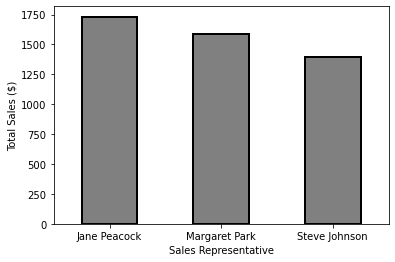

In [19]:
with sqlite3.connect('chinook.db') as conn:
    q = '''
    SELECT employee_id,
            sales_rep_name,
            ROUND(SUM(total_per_invoice), 2) total_sales
    FROM sales_rep_customer_details
    GROUP BY employee_id
    ORDER BY total_sales DESC;
    '''
    sales_rep_performance_data = pd.read_sql(q, conn)
    
print(sales_rep_performance_data)
sales_rep_performance_data.plot(kind='bar', y='total_sales', x='sales_rep_name', ylabel='Total Sales ($)', xlabel='Sales Representative',
                                      edgecolor='black', linewidth=2, color='grey', legend=False, rot=0)

Our data shows that Jane Peacock has the highest amount of sale among the sale support agents. However the differences in sales from others is between \\$200 and \\$400. We will check the hiring date of all sale support agents to find if they started working at the chinook store at simillar time. We can claim that Jane Peacock is the best performer only if all of them were hired at simillar time by chinook store.    

<class 'sqlite3.Connection'>
   employee_id sales_rep_name  total_sales            hire_date
0            3   Jane Peacock      1731.51  2017-04-01 00:00:00
1            4  Margaret Park      1584.00  2017-05-03 00:00:00
2            5  Steve Johnson      1393.92  2017-10-17 00:00:00


<AxesSubplot:xlabel='Sales Representative', ylabel='Total Sales ($)'>

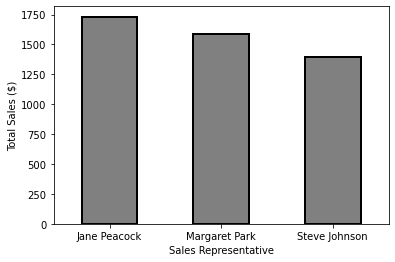

In [20]:
with sqlite3.connect('chinook.db') as conn:
    print(type(conn))
    q = '''
    SELECT employee_id,
            sales_rep_name,
            ROUND(SUM(total_per_invoice), 2) total_sales,
            hire_date            
    FROM sales_rep_customer_details
    GROUP BY employee_id
    ORDER BY total_sales DESC;
    '''
    sales_rep_performance_data = pd.read_sql(q, conn)
    
print(sales_rep_performance_data)
sales_rep_performance_data.plot(kind='bar', y='total_sales', x='sales_rep_name', ylabel='Total Sales ($)', xlabel='Sales Representative',
                                      edgecolor='black', linewidth=2, color='grey', legend=False, rot=0)

### Conclusion: Project Goal-2
The above table shows that Jane Peacock started almost a month earlier than Margaret Park, and 6 months earlier than Steve Johnson. The higher amount of sales by Jane Peacock could be because he started working earlier in the store, and this means that all the sales support agents are good performers. 

## Project Goal-3
Compare the performance of each country by collecting total number of customers, total value of sales, average value of sales per customer, and average order value. The countries with only one customer was relabelled as Other. 

### Collate Data On Purchases From Different Countries

In [21]:
%%sql
DROP VIEW IF EXISTS country_purchase_data;
CREATE VIEW IF NOT EXISTS country_purchase_data AS
    WITH 
        number_cust_per_country AS
            (
            SELECT country,
                 COUNT(customer_id) num_cust
            FROM customer
            GROUP BY country
            ),
        number_orders_total_value_per_country AS
            (
            SELECT country,
                COUNT(invoice_id) num_orders,
                SUM("total per invoice") total_value
            FROM sel_cols
            GROUP BY country     
            )

    SELECT nc.country,
            nc.num_cust total_number_of_customers,
            notv.num_orders total_number_of_orders,
            notv.total_value total_value_of_sales
    FROM number_cust_per_country nc
    INNER JOIN number_orders_total_value_per_country notv
    ON nc.country == notv.country;
  

 * sqlite:///chinook.db
Done.
Done.


[]

Overview Of VIEW country_purchase_data

In [22]:
%%sql
SELECT *
FROM country_purchase_data; 

 * sqlite:///chinook.db
Done.


country,total_number_of_customers,total_number_of_orders,total_value_of_sales
Argentina,1,5,39.6
Australia,1,10,81.18
Austria,1,9,69.3
Belgium,1,7,60.38999999999999
Brazil,5,61,427.68000000000006
Canada,8,76,535.5900000000001
Chile,1,13,97.02000000000001
Czech Republic,2,30,273.24000000000007
Denmark,1,10,37.61999999999999
Finland,1,11,79.2


Now we will group the countries with total_number_of_customers as 1 in Other, and display the table such that the record for other country always appears at the end of the table.

In [23]:
%%sql
SELECT *,
        CASE
            WHEN total_number_of_customers == 1 THEN "Other"
            ELSE country
        END AS country_relabelled
FROM country_purchase_data; 

 * sqlite:///chinook.db
Done.


country,total_number_of_customers,total_number_of_orders,total_value_of_sales,country_relabelled
Argentina,1,5,39.6,Other
Australia,1,10,81.18,Other
Austria,1,9,69.3,Other
Belgium,1,7,60.38999999999999,Other
Brazil,5,61,427.68000000000006,Brazil
Canada,8,76,535.5900000000001,Canada
Chile,1,13,97.02000000000001,Other
Czech Republic,2,30,273.24000000000007,Czech Republic
Denmark,1,10,37.61999999999999,Other
Finland,1,11,79.2,Other


Use the above query as a subquery and combine the data for Other into a single record.

In [24]:
%%sql
SELECT country_relabelled country,
        SUM(total_number_of_customers) total_number_of_customers,
        SUM(total_number_of_orders) total_number_of_orders,
        SUM(total_value_of_sales) total_value_of_sales
FROM (
        SELECT *,
                CASE
                    WHEN total_number_of_customers == 1 THEN "Other"
                    ELSE country
                END AS country_relabelled
        FROM country_purchase_data
        )
GROUP BY country_relabelled;

 * sqlite:///chinook.db
Done.


country,total_number_of_customers,total_number_of_orders,total_value_of_sales
Brazil,5,61,427.68000000000006
Canada,8,76,535.5900000000001
Czech Republic,2,30,273.24000000000007
France,5,50,389.0699999999999
Germany,4,41,334.62
India,2,21,183.14999999999998
Other,15,147,1094.9399999999998
Portugal,2,29,185.13000000000002
USA,13,131,1040.4899999999998
United Kingdom,3,28,245.52


Create a VIEW for the above query as country_relabelled_purchase_data.

In [25]:
%%sql
DROP VIEW IF EXISTS country_relabelled_purchase_data;
CREATE VIEW IF NOT EXISTS country_relabelled_purchase_data AS
    SELECT country_relabelled country,
            SUM(total_number_of_customers) total_number_of_customers,
            SUM(total_number_of_orders) total_number_of_orders,
            SUM(total_value_of_sales) total_value_of_sales
    FROM (
            SELECT *,
                    CASE
                        WHEN total_number_of_customers == 1 THEN "Other"
                        ELSE country
                    END AS country_relabelled
            FROM country_purchase_data
            )
    GROUP BY country_relabelled;

 * sqlite:///chinook.db
Done.
Done.


[]

### Compute Averages And Display Other At The End

In [26]:
%%sql
SELECT
    crpd.*,
    CASE
        WHEN crpd.country == 'Other' THEN 1
        ELSE 0
    END order_by
FROM country_relabelled_purchase_data crpd;

 * sqlite:///chinook.db
Done.


country,total_number_of_customers,total_number_of_orders,total_value_of_sales,order_by
Brazil,5,61,427.68000000000006,0
Canada,8,76,535.5900000000001,0
Czech Republic,2,30,273.24000000000007,0
France,5,50,389.0699999999999,0
Germany,4,41,334.62,0
India,2,21,183.14999999999998,0
Other,15,147,1094.9399999999998,1
Portugal,2,29,185.13000000000002,0
USA,13,131,1040.4899999999998,0
United Kingdom,3,28,245.52,0


We will use the above result as subquery, and compute the averages. This way we can display the result with Other at the end of the table.

In [27]:
%%sql
SELECT country,
        total_number_of_customers,
        ROUND(total_value_of_sales, 2) total_value_of_sales,
        ROUND(total_value_of_sales/total_number_of_customers, 2) average_value_of_sales_per_customer,
        ROUND(total_value_of_sales/total_number_of_orders, 2) average_order_value        
FROM ( SELECT
            crpd.*,
            CASE
                WHEN crpd.country == 'Other' THEN 1
                ELSE 0
            END order_by
        FROM country_relabelled_purchase_data crpd
        )
ORDER BY order_by ASC, total_value_of_sales DESC

 * sqlite:///chinook.db
Done.


country,total_number_of_customers,total_value_of_sales,average_value_of_sales_per_customer,average_order_value
USA,13,1040.49,80.04,7.94
Canada,8,535.59,66.95,7.05
Brazil,5,427.68,85.54,7.01
France,5,389.07,77.81,7.78
Germany,4,334.62,83.66,8.16
Czech Republic,2,273.24,136.62,9.11
United Kingdom,3,245.52,81.84,8.77
Portugal,2,185.13,92.57,6.38
India,2,183.15,91.58,8.72
Other,15,1094.94,73.0,7.45


### Conclusion: Project Goal-3
There are opportunities in countries like India, Portugal, UK and Czech Republic. These countries have low total_value_of_sales due to low number of customers. However higher average_value_of_sales_per_customer indicates that people are capable of spending more. This is especially true for Czech Republic with the highest value of \\$136.62 for the average_value_of_sales_per_customer. But we have to keep in mind that this analysis is based on very little data, so it is advisable to collect more data from new customers in these countries and make sure that these trends hold for the new set of customers. 